In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

(784, 1)


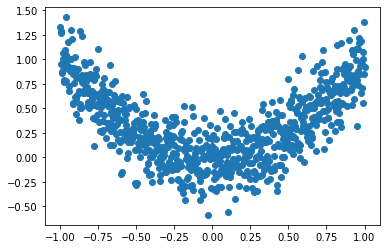

In [27]:
#生成200个随机点
x_data=np.linspace(-1,1,784)[:,np.newaxis]#从-1到1生成784个随机数，后面为给这784个数据加上维度，成为784x1的列向量
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data)+noise #平方加噪声
print(y_data.shape)
plt.scatter(x_data,y_data)
plt.show()

In [30]:
x = tf.compat.v1.placeholder(tf.float32,[None,1])#输入，Nx1的数据
print(x.shape)

(None, 1)


In [29]:
#构建神经网络 拟合非线性分布
x = tf.compat.v1.placeholder(tf.float32,[None,1])#输入，Nx1的数据
y = tf.compat.v1.placeholder(tf.float32,[None,1])#标签，Nx1的数据
#定义droupout
keep_prob = tf.compat.v1.placeholder(tf.float32)

#神经网络结构 1-1000-500-1

w1 = tf.Variable(tf.random.normal([1,1000],stddev=0.1))#初始化权值矩阵,初始化为随机值，输入层到隐藏层
b1 = tf.Variable(tf.zeros([1000])+0.1)#初始化为常数 为0 或者 0.1
wx_plus_b_1 = tf.matmul(x,w1) + b1
l1 = tf.nn.tanh(wx_plus_b_1)
l1_drop = tf.nn.dropout(l1,keep_prob)

w2 = tf.Variable(tf.random.normal([1000,500],stddev=0.1))#这些会是需要调节的变量
b2 = tf.Variable(tf.zeros([500])+0.1)
wx_plus_b_2 = tf.matmul(l1_drop,w2) + b2
l2 = tf.nn.tanh(wx_plus_b_2)
l2_drop = tf.nn.dropout(l2,keep_prob)

w3 = tf.Variable(tf.compat.v1.truncated_normal([500,1],stddev=0.1))
b3 = tf.Variable(tf.zeros([1])+0.1)
prediction = tf.nn.softmax(tf.matmul(l2_drop,w3)+b3)

#定义代价函数
loss = tf.compat.v1.losses.softmax_cross_entropy(y,prediction)
#使用梯度下降法 最小化loss
train = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for _ in range(100):
        sess.run(train,feed_dict = {x:x_data,y:y_data})#这里才是真正的计算
        
    #获取预测值 进行比较
    prediction_value = sess.run(prediction,feed_dict = {x:x_data})
    #画图
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw = 5)
    plt.show()


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_21' with dtype float
	 [[node Placeholder_21 (defined at <ipython-input-29-c6f5827fde79>:5) ]]

Original stack trace for 'Placeholder_21':
  File "/Users/syy/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/syy/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/Users/syy/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "/Users/syy/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/Users/syy/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-c6f5827fde79>", line 5, in <module>
    keep_prob = tf.compat.v1.placeholder(tf.float32)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py", line 3100, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6808, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py", line 742, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3477, in _create_op_internal
    ret = Operation(
  File "/Users/syy/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 1949, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
这里的激活函数如果为relu函数，效果不太好，对于简单的数据和模型 relu效果可能不会太好
relu函数比较适合 复杂的数据和模型，比如网络层数比较多的时候，效果会比较好